## Importação das bibliotecas

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Transformacao de Cores

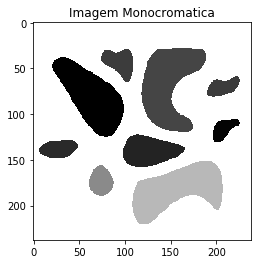

In [90]:
# Le a imagem de entrada
image = cv2.imread("objetos4.png")

# Usa a funçao cvtColor para transformar a imagem BGR em escala de cinza
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Salva a imagem
cv2.imwrite("gray_object_4.png",gray_image)

plt.imshow(gray_image, cmap=plt.cm.gray)
plt.title('Imagem Monocromatica')
plt.show()

## Contornos dos Objetos

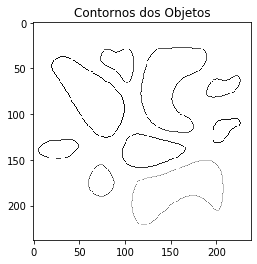

In [91]:
# Mascara 1
mask = [[0,-1,0],[-1,4,-1],[0,-1,0]]

# Mascara 2
mask2 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]

# Filter2D realiza uma convoluçao entre a imagem em escalas de cinza
# e a mascara definida anteriormente
image_contour = cv2.filter2D(gray_image,-1,np.array(mask))

# Salva a imagem
cv2.imwrite("contours_object_4.png",255 - image_contour)

# Calcula-se o negativo da imagem de entrada para obter uma nova imagem com fundo
# Branco e bordas pretas
plt.imshow(255 - image_contour, cmap=plt.cm.gray)
plt.title('Contornos dos Objetos')
plt.show()


## Calculo da área, perimetro e quantidade de objetos

Numero de regioes:  9

 regiao: 8 perimetro: 101.982754945755 area: 716.5
 regiao: 7 perimetro: 311.0782079696655 area: 4067.0
 regiao: 6 perimetro: 108.66904711723328 area: 688.5
 regiao: 5 perimetro: 179.78174459934235 area: 1761.5
 regiao: 4 perimetro: 94.42640566825867 area: 478.0
 regiao: 3 perimetro: 104.91168713569641 area: 584.0
 regiao: 2 perimetro: 265.1198377609253 area: 3690.5
 regiao: 1 perimetro: 125.63960921764374 area: 843.5
 regiao: 0 perimetro: 319.4213538169861 area: 4107.0


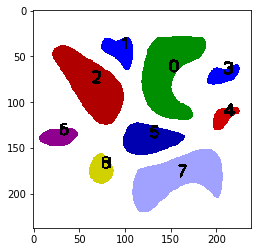

In [92]:
# Se faz uso da funçao findContours para encontrar os contornos dos objetos contidos
# na imagem filtrada
images, cnts, h = cv2.findContours(image_contour.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copia a imagem original e salva em uma nova variavel
image_object = image.copy()
i = len(cnts)-1

# Para cada contorno de cada objeto encontrado na imagem de entrada (c)
# se calcula seu perimetro, area e  o centroide
print ("Numero de regioes: ",len(cnts))
print ("")

for c in cnts:
    
    # Area
    # Para obter a area aproximada da regiao do objeto usa-se a funçao contourArea
    # Esta funçao calcula a area do contorno do regiao do objeto
    area = cv2.contourArea(c)
    
    # Perimetro
    # Calcula o perimetro ou tamanho do arco da regiao do objeto encontrado na imagem
    perimetro = cv2.arcLength(c,True)
    
    # Centroide
    # Para obter o centroide se calcula os momentos de terceiro ordem
    # usando a funçao cv2.moments
    M = cv2.moments(c)
    cx = int(M['m10']/M['m00']) #se divide o terceiro momento entre o primeiro momento para obter o centroide do objeto no direçao no eixo x
    cy = int(M['m01']/M['m00']) #se divide o segundo momento entre o primeiro momento para obter o centroide do objeto no direçao no eixo y
    
    # Se mostra cada regiao rotulada individualmente na imagem
    cv2.putText(image_object,str(i),(cx,cy), cv2.FONT_HERSHEY_PLAIN, 1.3,(0,0,0),2)
    
    # Imprime-se a informaçao do perimetro e area da regiao de cada objeto
    print(" regiao: "+(str(i))+" perimetro: "+str(perimetro)+" area: "+str(area))
    i = i-1
    
# Salva a imagem 
cv2.imwrite("count_object_4.png",image_object)
plt.imshow(image_object, cmap=plt.cm.gray)
plt.show() 

## Calculo de numero de regiões pequenas, medias e grandes

In [93]:
# Usa a funçao findContours para encontrar os contornos da regiao dos objetos contidos
# na imagem filtrada
images, cnts, h = cv2.findContours(image_contour.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Para cada contorno de cada objeto encontrado na imagem de entrada (c)
# calcula a area, se o calculo é menor a 1500 é uma regiao pequena, maior a 1500 e menor a 3000
# ou maior a 3000 é uma regiao media, e se é maior a 3000 é uma grande regiao
areas = np.array([cv2.contourArea(c) for c in cnts])           
pequeno = len(np.where(areas < 1500)[0])
medio = len(np.where( (1500 < areas) & (areas < 3000))[0])
grande = len(np.where(areas > 3000)[0])

# Imprime o numero de regioes por tamanho
print ("numero de regioes pequenas:",str(pequeno))
print ("numero de regioes medias:",str(medio))
print ("numero de regioes grandes:",str(grande))

numero de regioes pequenas: 5
numero de regioes medias: 1
numero de regioes grandes: 3


## Histograma do Objeto

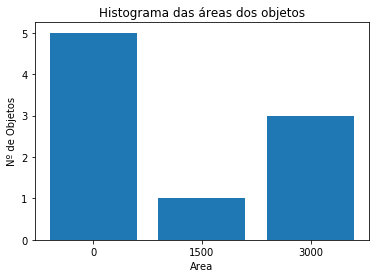

In [95]:
# É definido o range das areas declaradas anteriormente
n_object = range(0,3500,1500)

# Se guarda o numero de regioes em um vetor
n_area = [pequeno,medio,grande]

# A variavel regiao o numero de objetos encontrados por numero de regioes por tamanho de area
regiao = np.arange(len(n_area))

# Se representa  em uma barra o numero de objetos por area
plt.bar(regiao, n_area)
plt.xlabel('Area')
plt.ylabel('Nº de Objetos')
plt.xticks(regiao, n_object)
plt.title('Histograma das áreas dos objetos')
plt.show()